# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(17, 9)})

D = np.loadtxt('lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [17]:
mse = []
alphas = np.linspace(0, 10, 100)
for alpha in alphas:
    X_b = np.hstack((np.ones(shape=(len(X), 1)), X))
    mse.append(((Y - X_b @ (np.linalg.inv(X_b.T @ X_b + alpha * np.ones(X_b.shape[1])) @ X_b.T @ Y)) ** 2).mean())

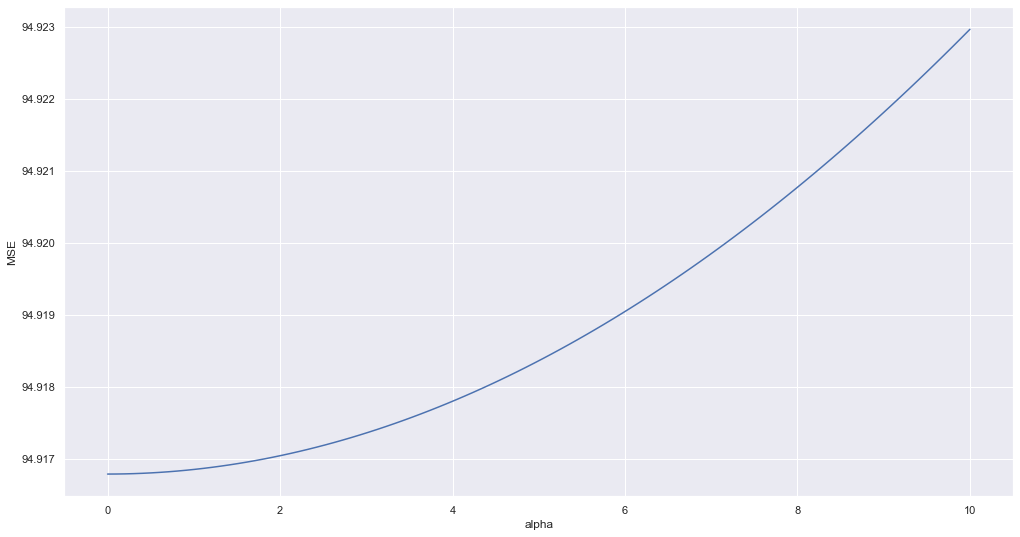

In [18]:
sns.lineplot(x=alphas, y=mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [19]:
def five_fold():
    indices = np.random.permutation(np.arange(len(X)))
    fold_size = len(X) // 5
    return [indices[:fold_size],
            indices[fold_size : 2 * fold_size],
            indices[2 * fold_size : 3 * fold_size],
            indices[3 * fold_size : 4 * fold_size],
            indices[4 * fold_size :]]

In [20]:
alphas = np.linspace(0.001, 1000, 10000)
folds = five_fold()
best = 1e10
train_errors = []
test_errors = []
for alpha in alphas:
    now = 0
    now_train = 0
    for (i, fold) in enumerate(folds):
            train = []
            for k in np.delete(range(5), i):
                train += list(folds[k])
            train = np.array(train)
            test = fold
            X_train = X[train]
            Y_train = Y[train]
            X_test = X[test]
            Y_test = Y[test]
            
            X_b = np.hstack((np.ones(shape=(len(X_train), 1)), X_train))
            Y_pred = np.hstack((np.ones(shape=(len(X_test), 1)), X_test)) @ (np.linalg.inv(X_b.T @ X_b + alpha * np.ones(X_b.shape[1])) @ X_b.T @ Y_train)
            now += ((Y_test - Y_pred) ** 2).mean()
            Y_pred_train = X_b @ (np.linalg.inv(X_b.T @ X_b + alpha * np.ones(X_b.shape[1])) @ X_b.T @ Y_train)
            now_train += ((Y_train - Y_pred_train) ** 2).mean()
    now = now / 5
    now_train = now_train / 5
    if now < best:
        best = now
        best_alpha = alpha
    test_errors.append(now)
    train_errors.append(now_train)
best_alpha

0.501049504950495

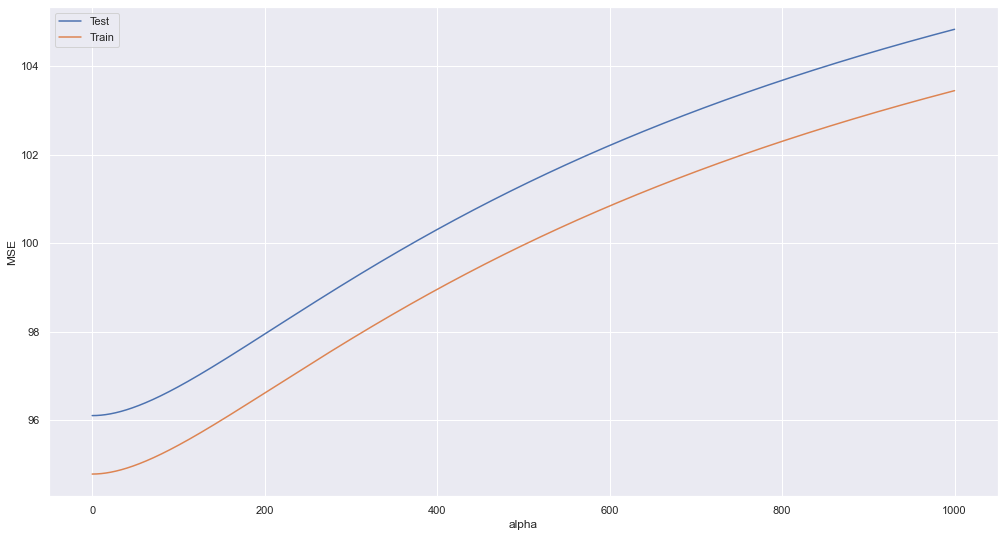

In [21]:
sns.lineplot(x=alphas, y=test_errors, label='Test')
sns.lineplot(x=alphas, y=train_errors, label='Train')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

In [22]:
sizes = (np.linspace(0.01, 1, 1000) * len(X_train)).astype(int)
folds = five_fold()
train_errors = []
test_errors = []
for size in sizes:
    now = 0
    now_train = 0
    for (i, fold) in enumerate(folds):
            train = []
            for k in np.delete(range(5), i):
                train += list(folds[k])
            train = np.array(train)
            test = fold
            X_train = X[train][:size]
            Y_train = Y[train][:size]
            X_test = X[test]
            Y_test = Y[test]
            
            X_b = np.hstack((np.ones(shape=(len(X_train), 1)), X_train))
            Y_pred = np.hstack((np.ones(shape=(len(X_test), 1)), X_test)) @ (np.linalg.inv(X_b.T @ X_b + best_alpha * np.ones(X_b.shape[1])) @ X_b.T @ Y_train)
            now += ((Y_test - Y_pred) ** 2).mean()
            Y_pred_train = X_b @ (np.linalg.inv(X_b.T @ X_b + best_alpha * np.ones(X_b.shape[1])) @ X_b.T @ Y_train)
            now_train += ((Y_train - Y_pred_train) ** 2).mean()
    now = now / 5
    now_train = now_train / 5
    test_errors.append(now)
    train_errors.append(now_train)

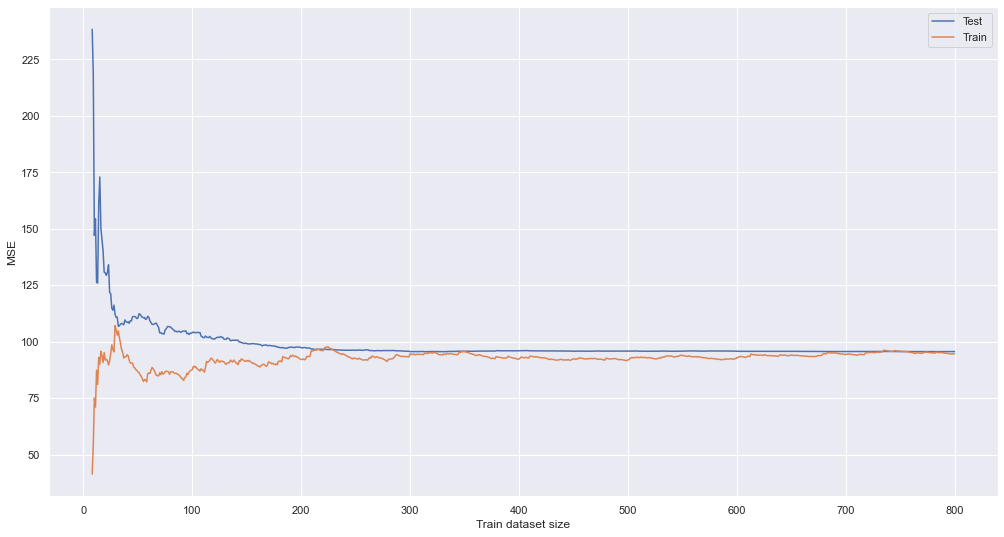

In [23]:
sns.lineplot(x=sizes, y=test_errors, label='Test')
sns.lineplot(x=sizes, y=train_errors, label='Train')
plt.xlabel('Train dataset size')
plt.ylabel('MSE')
plt.show()